In [1]:
import pandas as pd
import pickle
import sklearn.cluster as cluster
from config import OUTPUT_WITH_EMBEDDING_PICKLE_PATH, WHY_NOT_ETHICAL_CLEAN_TEXT_COLUMN, RISK_1_COLUMN, EMBEDDING_COLUMN

In [2]:
with open(OUTPUT_WITH_EMBEDDING_PICKLE_PATH, "rb") as f:
    df = pickle.load(f)

relevant_df = df[[WHY_NOT_ETHICAL_CLEAN_TEXT_COLUMN, RISK_1_COLUMN, EMBEDDING_COLUMN]]

In [3]:
relevant_df.sample(3)

,why.not.ethical_clean,Risk 1,embedding
94,other countries are not getting the clear orig...,limited readability,"[-0.0011221684, 0.0017770531, 0.0058659995, -0..."
61,"you have rights to items purchased, any visual...",third party data traresfers - international + ...,"[-0.025326552, -0.041191638, 0.023590395, -0.0..."
59,the user has no ownership rights to parts in t...,third party is traresfers / lack of transparency,"[0.0039008171, 0.011354255, 0.0005762104, -0.0..."


In [4]:
embeddings = list(relevant_df[EMBEDDING_COLUMN])

In [5]:
%%time
# todo: use different number components and see effects
import umap.umap_ as umap
umap_embeddings = umap.UMAP(n_neighbors=15,
                            n_components=5,
                            metric='cosine').fit_transform(embeddings)

/home/amit/python_envs/nlp_env/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
import hdbscan
clusters = hdbscan.HDBSCAN(min_cluster_size=15,
                          metric='euclidean',
                          cluster_selection_method='eom').fit(umap_embeddings)
# somehow all clusters are -1. add more data

/tmp/ipykernel_153546/1495784170.py:14: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


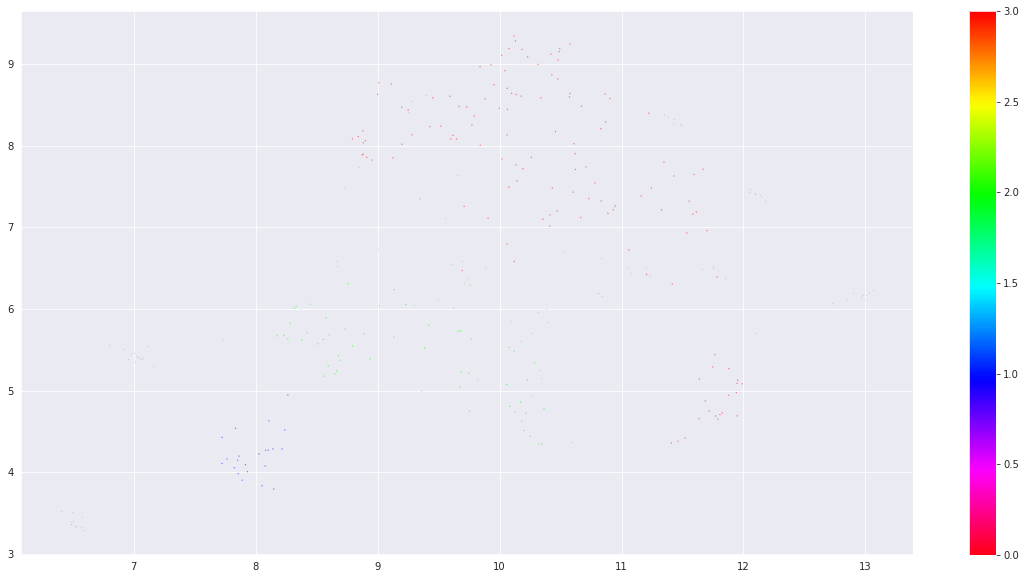

In [8]:
import matplotlib.pyplot as plt

# Prepare data
umap_2d_embedding = umap.UMAP(n_neighbors=15, n_components=2, min_dist=0.0, metric='cosine').fit_transform(embeddings)
result = pd.DataFrame(umap_2d_embedding, columns=['x', 'y'])
result['labels'] = clusters.labels_

# Visualize clusters
fig, ax = plt.subplots(figsize=(20, 10))
outliers = result.loc[result.labels == -1, :]
clustered = result.loc[result.labels != -1, :]
plt.scatter(outliers.x, outliers.y, color='#BDBDBD', s=0.05)
plt.scatter(clustered.x, clustered.y, c=clustered.labels, s=0.05, cmap='hsv_r')
plt.colorbar()

In [9]:
result.sample(5)

,x,y,labels
274,6.566268,3.330152,-1
209,9.671897,5.039820,2
51,9.661597,5.728665,2
159,11.383181,8.347310,-1
105,9.384877,5.524195,2


In [10]:
from collections import Counter
Counter(result["labels"]).most_common()

[(3, 108), (-1, 97), (2, 52), (1, 22), (0, 21)]